In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow

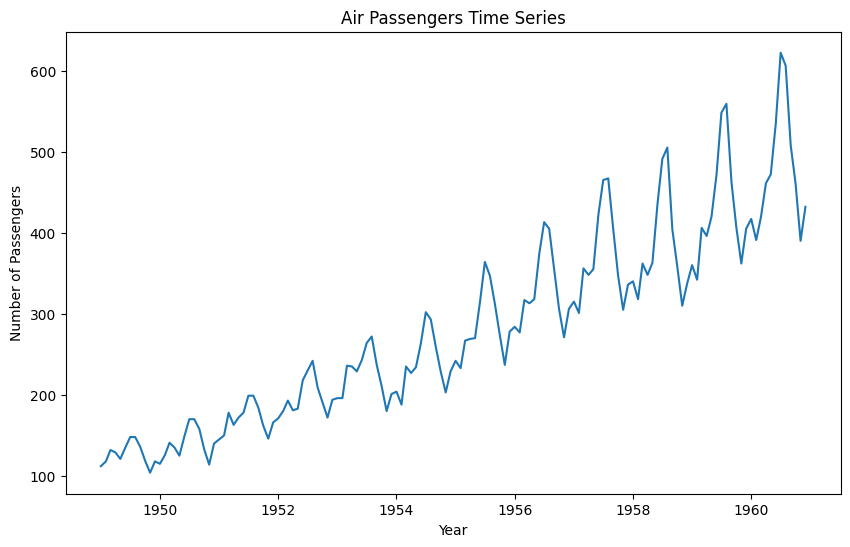

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("AirPassengers.csv")

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' column as the index
data.set_index('Month', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Number of time steps to look back
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
4/4 [==============================] - 2s 11ms/step - loss: 0.1283
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1053
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0871
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0707
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0551
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0396
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0256
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0166
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0141
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 13/100
4/4 [==============================] - 0s 10

1/1 [==============================] - 0s 25ms/step


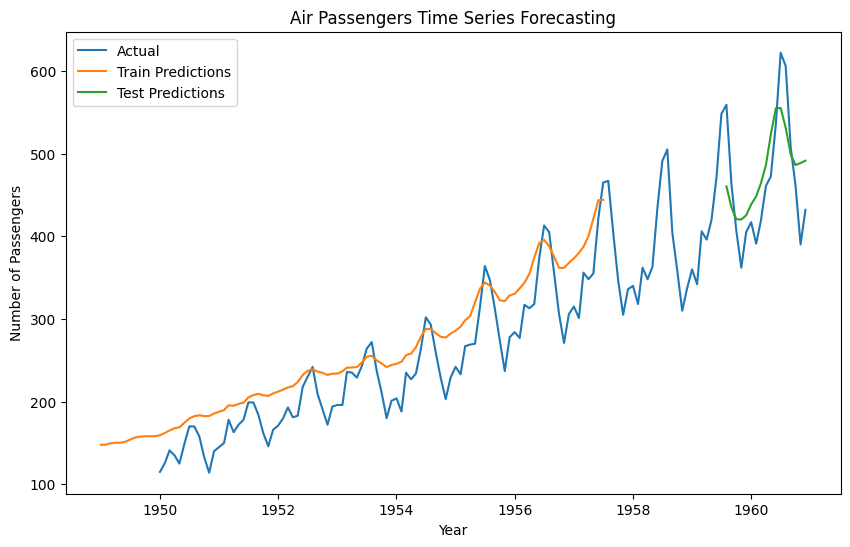

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[seq_length:], data['#Passengers'][seq_length:], label='Actual')
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[-len(test_predictions):], test_predictions, label='Test Predictions')
plt.title('Air Passengers Time Series Forecasting')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
